In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Diffusion-Based Deep Generative Models (DDGM)

### Diffusion-Based Deep Generative Models

####  Introduction

In Section 5.5, we discussed the challenge of learning useful representations in latent variable models, particularly focusing on hierarchical variational autoencoders (VAEs). A key issue in these models is that the **variational posterior** can collapse to the **prior**, which leads to the learning of meaningless representations. To elaborate, when the architecture uses bottom-up variational posteriors (i.e., stochastic dependencies go from observables to the last latents), the model can struggle to learn meaningful latent variables.

In a **hierarchical VAE**, this collapse happens because the model is learning the latent variables in a bottom-up manner, starting from $ z_2 $ and $ z_1 $, which makes the learning process troublesome, especially when dealing with top-down generative distributions. 

An interesting observation here is that this **bottom-up approach** with variational posteriors may not always lead to optimal results. This brings us to the concept of **top-down VAEs**. These models invert the learning structure and show promise in overcoming some of the challenges posed by traditional bottom-up VAEs. 

But does that mean the vanilla hierarchical VAE structure is useless? Certainly not! In fact, certain approaches combine both bottom-up and top-down structures to overcome these limitations. One such promising approach is the **Diffusion-Based Deep Generative Models (DDGM)**.

### Diffusion-Based Deep Generative Models (DDGM)

DDGMs are a class of generative models that can be thought of as hierarchical VAEs, with the main distinction being that the **bottom-up path** (i.e., the variational posteriors) is defined by a **diffusion process**—such as a **Gaussian diffusion**—while the **top-down path** is parameterized by **Deep Neural Networks (DNNs)**, typically using **reversed diffusion**. 

#### Key Insights into DDGMs

1. **Gaussian Diffusion**: 
   In DDGMs, the variational posteriors are fixed and not learnable. The process adds **Gaussian noise** at each layer, which leads to the last layer resembling pure Gaussian noise, as shown in the diagram below.

2. **No Posterior Collapse**: 
   A major problem in hierarchical VAEs is the potential collapse of the posterior to the prior. With DDGMs, this issue is eliminated because the final layer is designed to have a **standard Gaussian distribution** by default.

3. **Fixed Bottom-up Path**: 
   One of the unique aspects of DDGMs is that the bottom-up path (i.e., the variational posteriors) does not require learnable parameters. This fixed diffusion process makes DDGMs more stable and reliable for learning complex generative tasks.

#### Advantages of DDGMs

- **State-of-the-art Image Synthesis**:
  DDGMs have shown excellent performance in image generation, often producing high-quality images and outdoing other generative models in terms of visual fidelity.

  $$
  \text{DDGM}(x) = f(\text{Gaussian Diffusion}, \text{Top-down DNN})
  $$

- **Applications to Audio and Text Synthesis**:
  Besides image generation, DDGMs have also achieved **promising results** in generating audio and text, making them highly versatile for different types of generative tasks.

- **Theoretical Foundation in Stochastic Differential Equations (SDEs)**:
  The DDGM framework is closely related to stochastic differential equations, and it is of great interest from a theoretical perspective. The connection to SDEs provides a solid foundation for understanding and improving DDGMs.

#### Example: Gaussian Diffusion Applied to Images

An example of applying a **Gaussian diffusion** process to an image (e.g., of a cat) is shown in the figure below. Here, the image undergoes a sequence of transformations, progressively adding Gaussian noise to the layers, eventually resulting in pure Gaussian noise at the final layer.

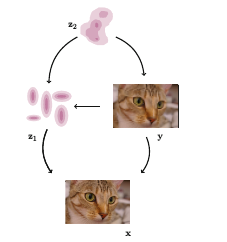
Fig.22 A two-level VAE with an auxiliary set of deterministic variables .y (e.g., downscaled images).

### Drawbacks of DDGMs

While DDGMs are powerful, they come with their own limitations:

1. **No Representation Learning**:
   Currently, DDGMs are not capable of learning useful latent representations in the same way VAEs or other generative models can. This means they are not as useful for tasks requiring **semantic representation learning**.

2. **No Bottleneck in Latent Space**:
   Similar to **flow-based models**, DDGMs do not impose a bottleneck in the latent space, meaning the dimensionality of the input remains constant throughout the model. This can limit their ability to learn more compact and useful latent representations.

### Conclusion

Diffusion-Based Deep Generative Models (DDGMs) represent an exciting step forward in generative modeling, particularly for image, audio, and text synthesis. They combine the benefits of hierarchical VAEs with a fixed bottom-up diffusion process, solving the issue of posterior collapse and providing stable and powerful generative models. However, the lack of a bottleneck and the inability to learn representations may limit their usefulness for certain tasks. Despite these drawbacks, DDGMs have become very popular and have great theoretical implications, especially due to their connection with stochastic differential equations.


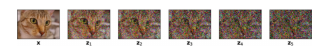

Fig.23 An example of applying a Gaussian diﬀusion to an image of a cat, .x.

##  Model Formulation

Deep diffusion probabilistic models (DDGMs) were originally proposed in [77] and are inspired by nonequilibrium statistical physics. The primary idea is to iteratively destroy the structure in data through a **forward diffusion process**, and afterward, to learn a **reverse diffusion process** to restore the structure in the data.

In a follow-up paper [76], the authors combined recent developments in deep learning with the diffusion process to train a powerful and flexible deep generative model that achieved **state-of-the-art (SOTA)** results in the task of image synthesis.

Here, we aim to establish a connection between hierarchical latent variable models and DDGMs. We continue with the goal of finding a distribution over data, $ p_{\theta}(x) $, but we introduce an additional set of latent variables $ z_1^T = [z_1, \dots, z_T] $. The marginal likelihood is defined as:

$$
p_{\theta}(x) = \int p_{\theta}(x, z_1^T) dz_1^T \tag{5.86}
$$

The joint distribution is modeled as a **first-order Markov chain** with Gaussian transitions, i.e.,

$$
p_{\theta}(x, z_1^T) = p_{\theta}(x | z_1) \prod_{i=1}^{T-1} p_{\theta}(z_i | z_{i+1}) p_{\theta}(z_T) \tag{5.87}
$$

where $ x \in \mathbb{R}^D $ and $ z_i \in \mathbb{R}^D $ for $ i = 1, \dots, T $. Note that the latents have the same dimensionality as the observables. This setup mirrors the scenario in **flow-based models**. All distributions are parameterized using **deep neural networks (DNNs)**.

At this point, we haven’t introduced anything fundamentally new; this is still a **hierarchical latent variable model**. To proceed, we introduce a family of variational posteriors:

$$
Q_{\phi}(z_1^T | x) = q_{\phi}(z_1 | x) \prod_{i=2}^{T} q_{\phi}(z_i | z_{i-1}) \tag{5.88}
$$

The key distinction lies in the definition of these distributions. Previously, we used normal distributions parameterized by DNNs, but here we define them as a **Gaussian diffusion process** [77]:

$$
q_{\phi}(z_i | z_{i-1}) = \mathcal{N}(z_i | (1 - \beta_i) z_{i-1}, \beta_i I) \tag{5.89}
$$

where $ z_0 = x $. 

Notice that a single step of the diffusion process, $ q_{\phi}(z_i | z_{i-1}) $, operates by taking the previously generated object $ z_{i-1} $, scaling it by $ 1 - \beta_i $, and then adding noise with variance $ \beta_i $. To make this more explicit, we can write it using the **reparameterization trick**:

$$
z_i = (1 - \beta_i) z_{i-1} + \beta_i \epsilon \quad \text{where} \quad \epsilon \sim \mathcal{N}(0, I) \tag{5.90}
$$

In principle, $ \beta_i $ could be learned by backpropagation; however, as noted in [76, 77], it is often fixed. For instance, $ \beta_1 = 10^{-4} $ and $ \beta_T = 0.02 $ may be used.

### ELBO for Diffusion-Based Generative Models

The learning objective for DDGMs is derived from the **Evidence Lower Bound (ELBO)**, which can be formulated as follows:

$$
\ln p_{\theta}(x) = \int \frac{p_{\theta}(x, z_1^T)}{Q_{\phi}(z_1^T | x)} dz_1^T
$$

Expanding the ELBO:

$$
\begin{aligned}
\ln p_{\theta}(x) &\geq \mathbb{E}_{Q_{\phi}(z_1^T | x)} \left[ \ln p_{\theta}(x | z_1) + \sum_{i=1}^{T-1} \ln p_{\theta}(z_i | z_{i+1}) + \ln p_{\theta}(z_T) \right. \\
& \quad \left. - \sum_{i=2}^{T} \ln q_{\phi}(z_i | z_{i-1}) - \ln q_{\phi}(z_1 | x) \right] \\
&= \mathbb{E}_{Q_{\phi}(z_1^T | x)} \left[ \ln p_{\theta}(x | z_1) + \sum_{i=2}^{T-1} \left( \ln p_{\theta}(z_i | z_{i+1}) - \ln q_{\phi}(z_i | z_{i-1}) \right) \right. \\
& \quad \left. + \ln p_{\theta}(z_T) - \ln q_{\phi}(z_T | z_{T-1}) \right]
\end{aligned}
$$

This formulation represents the **ELBO** for the DDGM, and it involves calculating the **reconstruction error** and **KL divergences** between the model's predicted distributions and the variational posteriors.

### Conclusion

The model formulation for **Diffusion-Based Deep Generative Models (DDGMs)** leverages a forward diffusion process to destroy data structure and a reverse diffusion process to restore it. This approach offers a more flexible and powerful alternative to traditional hierarchical VAEs by using a fixed diffusion process for the bottom-up path and DNNs for the top-down generative process. The learning objective, **ELBO**, reflects the combination of the reconstruction error and KL divergence terms, which guide the optimization of the model.



## Model Formulation

Deep diffusion probabilistic models (DDGMs) were originally proposed in [77] and are inspired by nonequilibrium statistical physics. The primary idea is to iteratively destroy the structure in data through a **forward diffusion process**, and afterward, to learn a **reverse diffusion process** to restore the structure in the data.

In a follow-up paper [76], the authors combined recent developments in deep learning with the diffusion process to train a powerful and flexible deep generative model that achieved **state-of-the-art (SOTA)** results in the task of image synthesis.

Here, we aim to establish a connection between hierarchical latent variable models and DDGMs. We continue with the goal of finding a distribution over data, $ p_{\theta}(x) $, but we introduce an additional set of latent variables $ z_1^T = [z_1, \dots, z_T] $. The marginal likelihood is defined as:

$$
p_{\theta}(x) = \int p_{\theta}(x, z_1^T) dz_1^T \tag{5.86}
$$

The joint distribution is modeled as a **first-order Markov chain** with Gaussian transitions, i.e.,

$$
p_{\theta}(x, z_1^T) = p_{\theta}(x | z_1) \prod_{i=1}^{T-1} p_{\theta}(z_i | z_{i+1}) p_{\theta}(z_T) \tag{5.87}
$$

where $ x \in \mathbb{R}^D $ and $ z_i \in \mathbb{R}^D $ for $ i = 1, \dots, T $. Note that the latents have the same dimensionality as the observables. This setup mirrors the scenario in **flow-based models**. All distributions are parameterized using **deep neural networks (DNNs)**.

At this point, we haven’t introduced anything fundamentally new; this is still a **hierarchical latent variable model**. To proceed, we introduce a family of variational posteriors:

$$
Q_{\phi}(z_1^T | x) = q_{\phi}(z_1 | x) \prod_{i=2}^{T} q_{\phi}(z_i | z_{i-1}) \tag{5.88}
$$

The key distinction lies in the definition of these distributions. Previously, we used normal distributions parameterized by DNNs, but here we define them as a **Gaussian diffusion process** [77]:

$$
q_{\phi}(z_i | z_{i-1}) = \mathcal{N}(z_i | (1 - \beta_i) z_{i-1}, \beta_i I) \tag{5.89}
$$

where $ z_0 = x $. 

Notice that a single step of the diffusion process, $ q_{\phi}(z_i | z_{i-1}) $, operates by taking the previously generated object $ z_{i-1} $, scaling it by \( 1 - \beta_i \), and then adding noise with variance $ \beta_i $. To make this more explicit, we can write it using the **reparameterization trick**:

$$
z_i = (1 - \beta_i) z_{i-1} + \beta_i \epsilon \quad \text{where} \quad \epsilon \sim \mathcal{N}(0, I) \tag{5.90}
$$

In principle, $ \beta_i $ could be learned by backpropagation; however, as noted in [76, 77], it is often fixed. For instance, $ \beta_1 = 10^{-4} $ and $ \beta_T = 0.02 $ may be used.

### ELBO for Diffusion-Based Generative Models

The learning objective for DDGMs is derived from the **Evidence Lower Bound (ELBO)**, which can be formulated as follows:

$$
\ln p_{\theta}(x) = \int \frac{p_{\theta}(x, z_1^T)}{Q_{\phi}(z_1^T | x)} dz_1^T
$$

Expanding the ELBO:

$$
\begin{aligned}
\ln p_{\theta}(x) &\geq \mathbb{E}_{Q_{\phi}(z_1^T | x)} \left[ \ln p_{\theta}(x | z_1) + \sum_{i=1}^{T-1} \ln p_{\theta}(z_i | z_{i+1}) + \ln p_{\theta}(z_T) \right. \\
& \quad \left. - \sum_{i=2}^{T} \ln q_{\phi}(z_i | z_{i-1}) - \ln q_{\phi}(z_1 | x) \right] \\
&= \mathbb{E}_{Q_{\phi}(z_1^T | x)} \left[ \ln p_{\theta}(x | z_1) + \sum_{i=2}^{T-1} \left( \ln p_{\theta}(z_i | z_{i+1}) - \ln q_{\phi}(z_i | z_{i-1}) \right) \right. \\
& \quad \left. + \ln p_{\theta}(z_T) - \ln q_{\phi}(z_T | z_{T-1}) \right]
\end{aligned}
$$

This formulation represents the **ELBO** for the DDGM, and it involves calculating the **reconstruction error** and **KL divergences** between the model's predicted distributions and the variational posteriors.

### Conclusion

The model formulation for **Diffusion-Based Deep Generative Models (DDGMs)** leverages a forward diffusion process to destroy data structure and a reverse diffusion process to restore it. This approach offers a more flexible and powerful alternative to traditional hierarchical VAEs by using a fixed diffusion process for the bottom-up path and DNNs for the top-down generative process. The learning objective, **ELBO**, reflects the combination of the reconstruction error and KL divergence terms, which guide the optimization of the model.

### ELBO Expression in Terms of Kullback-Leibler Divergences

We can rewrite the ELBO in terms of Kullback-Leibler divergences as follows. Note that the expected value is taken with respect to $ Q_\phi(z_{-i} | x) $, to highlight that a proper variational posterior is used for the definition of the Kullback-Leibler divergence:

$$
L(x; \theta, \phi) = \mathbb{E}_{Q_\phi(z_{1:T}|x)} \left[ \ln p_\theta(x|z_1) \right] 
- \sum_{i=2}^{T} \mathbb{E}_{Q_\phi(z_{-i}|x)} \left[ \text{KL}\left( q_\phi(z_i|z_{i-1}) \parallel p_\theta(z_i|z_{i+1}) \right) \right]
- \mathbb{E}_{Q_\phi(z_{-T}|x)} \left[ \text{KL}\left( q_\phi(z_T|z_{T-1}) \parallel p_\theta(z_T) \right) \right]
- \mathbb{E}_{Q_\phi(z_{-1}|x)} \left[ \text{KL}\left( q_\phi(z_1|x) \parallel p_\theta(z_1|z_2) \right) \right]
$$

This can be expanded for a specific case where $ T = 5 $, which simplifies the DDGM model. Let us assume a fixed $ \beta_t \equiv \beta $ for simplicity.

### DDGM Model for $ T = 5 $

The joint distribution for $ p_\theta(x, z_1:5) $ is:

$$
p_\theta(x, z_1:5) = p_\theta(x|z_1) p_\theta(z_1|z_2) p_\theta(z_2|z_3) p_\theta(z_3|z_4) p_\theta(z_4|z_5) p_\theta(z_5)
$$

The variational posteriors are:

$$
Q_\phi(z_1:5 | x) = q_\phi(z_1|x) q_\phi(z_2|z_1) q_\phi(z_3|z_2) q_\phi(z_4|z_3) q_\phi(z_5|z_4)
$$

The ELBO for this specific case of $ T = 5 $ takes the form:

$$
L(x; \theta, \phi) = \mathbb{E}_{Q_\phi(z_1:5 | x)} \left[ \ln p_\theta(x|z_1) \right] 
- \sum_{i=2}^{4} \mathbb{E}_{Q_\phi(z_{-i}|x)} \left[ \text{KL}\left( q_\phi(z_i|z_{i-1}) \parallel p_\theta(z_i|z_{i+1}) \right) \right]
- \mathbb{E}_{Q_\phi(z_{-5}|x)} \left[ \text{KL}\left( q_\phi(z_5|z_4) \parallel p_\theta(z_5) \right) \right]
- \mathbb{E}_{Q_\phi(z_{-1}|x)} \left[ \text{KL}\left( q_\phi(z_1|x) \parallel p_\theta(z_1|z_2) \right) \right]
$$

Where:

$$
p_\theta(z_5) = \mathcal{N}(z_5 | 0, I)
$$

### Modeling the Inputs

To model the inputs $ p(x|z_1) $, we assume that the data $ x $ is continuous. We apply a simple trick by normalizing our inputs to values between $[-1, 1]$, and then using a Gaussian distribution with unit variance, where the mean is constrained using the $ \tanh $ nonlinearity:

$$
p(x|z_1) = \mathcal{N}\left( x \big| \tanh(NN(z_1)), I \right)
$$

Here, $ NN(z_1) $ is a neural network. As a result, the log-likelihood is equivalent to the negative Mean Squared Error:

$$
\ln p(x|z_1) = -\text{MSE}(x, \tanh(NN(z_1))) + \text{const}
$$

Thus, the log-likelihood corresponds to the (negative) MSE, which simplifies the training process.

### Summary

In this implementation, the forward diffusion (i.e., the variational posteriors) is fixed, and we only need to sample from them. The reverse diffusion requires applying Deep Neural Networks (DNNs). This simplification allows us to leverage the structure of a hierarchical VAE, with minor adjustments to the forward diffusion process and the reverse generative process.

By modifying a typical hierarchical VAE code, we can effectively implement the Diffusion-Based Deep Generative Model (DDGM).



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal


class DDGM(nn.Module):
    def __init__(self, input_dim, latent_dim, num_timesteps, beta_min=1e-4, beta_max=0.02):
        super(DDGM, self).__init__()
        
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.num_timesteps = num_timesteps

        # Linear Schedule for Beta
        self.beta_schedule = torch.linspace(beta_min, beta_max, num_timesteps)
        
        # Neural networks for top-down (decoder) and bottom-up (encoder)
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, latent_dim)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim)
        )

        # Variational posterior network qφ (bottom-up path)
        self.diffusion_step = nn.Sequential(
            nn.Linear(latent_dim, latent_dim),
            nn.ReLU(),
            nn.Linear(latent_dim, latent_dim)
        )

        # Set priors for zT (Standard Gaussian)
        self.prior = Normal(torch.zeros(latent_dim), torch.ones(latent_dim))

    def forward(self, x):
        # Encode the input x (bottom-up)
        z_0 = self.encoder(x)  # Latent variables z_0

        # Define the forward diffusion process (destruction of structure)
        z = z_0
        for t in range(self.num_timesteps):
            beta_t = self.beta_schedule[t]
            z = (1 - beta_t) * z + beta_t * torch.randn_like(z)  # Adding noise at each step
        
        # Decode the final z (top-down)
        reconstructed_x = self.decoder(z)
        
        return reconstructed_x, z

    def elbo_loss(self, x, reconstructed_x, z):
        # Reconstruction loss (using MSE as an example)
        recon_loss = F.mse_loss(reconstructed_x, x, reduction='mean')

        # KL divergence (regularizing the latent variables)
        kl_loss = 0.5 * torch.sum(z**2 - torch.log(torch.exp(z**2)), dim=1)  # Regularization to push to standard Gaussian
        kl_loss = torch.mean(kl_loss)

        return recon_loss + kl_loss

    def sample(self, batch_size):
        # Sampling through the reverse diffusion process
        z_T = torch.randn(batch_size, self.latent_dim)  # Start from Gaussian noise
        
        for t in reversed(range(self.num_timesteps)):
            beta_t = self.beta_schedule[t]
            z_T = (1 - beta_t) * z_T + beta_t * torch.randn_like(z_T)  # Reverse diffusion step
        
        # Decode to get data (x)
        sampled_x = self.decoder(z_T)
        
        return sampled_x


# Set device and define model parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_dim = 784  # Example input size for image data (28x28 flattened)
latent_dim = 64  # Latent space dimensionality
num_timesteps = 100  # Number of diffusion steps

# Initialize the DDGM model
model = DDGM(input_dim=input_dim, latent_dim=latent_dim, num_timesteps=num_timesteps).to(device)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
def train(model, train_loader, num_epochs=10):
    model.train()
    
    for epoch in range(num_epochs):
        total_loss = 0.0
        for batch_idx, (x, _) in enumerate(train_loader):
            x = x.view(x.size(0), -1).to(device)  # Flatten input images
            optimizer.zero_grad()
            
            # Forward pass
            reconstructed_x, z = model(x)
            
            # Compute ELBO loss
            loss = model.elbo_loss(x, reconstructed_x, z)
            
            # Backpropagate and optimize
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader)}')

# Sampling from the trained model
def generate_samples(model, batch_size=8):
    model.eval()
    with torch.no_grad():
        samples = model.sample(batch_size)
    return samples


# Example: Training and sampling (assuming train_loader is defined)
# train(model, train_loader, num_epochs=10)

# Example: Generate new samples
# samples = generate_samples(model, batch_size=8)
# Visualize or use the samples as needed


In [ ]:
### Diffusion-Based Deep Generative Model (DDGM) Implementation

The following is the Python implementation of the DDGM class.

```python
import torch
import torch.nn as nn

class DDGM(nn.Module):
    def __init__(self, p_dnns, decoder_net, beta, T, D):
        super(DDGM, self).__init__()

        print('DDGM by JT.')

        self.p_dnns = p_dnns  # A list of Sequentials; each defines a DNN for p(z_i | z_{i+1})
        self.decoder_net = decoder_net  # The last DNN for p(x|z1)

        # Other parameters
        self.D = D  # Dimensionality of the inputs
        self.T = T  # Number of steps
        self.beta = torch.FloatTensor([beta])  # Fixed variance of diffusion

    @staticmethod
    def reparameterization(mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + std * eps

    def reparameterization_gaussian_diffusion(self, x, i):
        return torch.sqrt(1. - self.beta) * x + torch.sqrt(self.beta) * torch.randn_like(x)

    def forward(self, x, reduction='avg'):
        # Forward Diffusion
        zs = [self.reparameterization_gaussian_diffusion(x, 0)]
        for i in range(1, self.T):
            zs.append(self.reparameterization_gaussian_diffusion(zs[-1], i))

        # Backward Diffusion
        mus = []
        log_vars = []
        for i in range(len(self.p_dnns) - 1, -1, -1):
            h = self.p_dnns[i](zs[i + 1])
            mu_i, log_var_i = torch.chunk(h, 2, dim=1)
            mus.append(mu_i)
            log_vars.append(log_var_i)

        # Last step: Outputting the means for x
        mu_x = self.decoder_net(zs[0])

        # ELBO Calculation
        # Reconstruction Error (RE)
        RE = log_standard_normal(x - mu_x).sum(-1)

        # Kullback-Leibler Divergence (KL)
        KL = (
            log_normal_diag(zs[-1], torch.sqrt(1. - self.beta) * zs[-1], torch.log(self.beta))
            - log_standard_normal(zs[-1])
        ).sum(-1)

        for i in range(len(mus)):
            KL_i = (
                log_normal_diag(zs[i], torch.sqrt(1. - self.beta) * zs[i], torch.log(self.beta))
                - log_normal_diag(zs[i], mus[i], log_vars[i])
            ).sum(-1)
            KL = KL + KL_i

        # Final ELBO
        if reduction == 'sum':
            loss = -(RE - KL).sum()
        else:
            loss = -(RE - KL).mean()

        return loss

    def sample(self, batch_size=64):
        z = torch.randn([batch_size, self.D])
        for i in range(len(self.p_dnns) - 1, -1, -1):
            h = self.p_dnns[i](z)
            mu_i, log_var_i = torch.chunk(h, 2, dim=1)
            z = self.reparameterization(torch.tanh(mu_i), log_var_i)

        mu_x = self.decoder_net(z)
        return mu_x

    def sample_diffusion(self, x):
        zs = [self.reparameterization_gaussian_diffusion(x, 0)]
        for i in range(1, self.T):
            zs.append(self.reparameterization_gaussian_diffusion(zs[-1], i))

        return zs[-1]


## Discussion on DDGMs

### Discussion Extensions
Currently, DDGMs (Deep Diffusion Generative Models) are very popular deep generative models. What we present here is very close to the original formulation of the DDGMs [77]. However, [76] introduced many interesting insights and improvements on the original idea, such as:

### Outcomes After Training
- (a) Randomly selected real images.
- (b) Unconditional generations from the DDGM.
- (c) A visualization of the last stochastic level after applying the forward diffusion. As expected, the resulting images resemble pure noise.
- (d) An example of a validation curve for the ELBO (Evidence Lower Bound).

### Key Insights and Improvements

1. **Marginalization of Intermediate Steps**:
   Since the forward diffusion consists of Gaussian distributions and linear transformations of means, it is possible to analytically marginalize out intermediate steps that yield the following distribution:

   $$ q(z_t | x) = \mathcal{N}(z_t | \alpha_t \bar{x}, (1 - \alpha_t)I), $$

   where $\alpha_t = 1 - \beta_t$ and $\bar{\alpha}_t = \prod_{s=1}^t \alpha_s$. This is an extremely interesting result because we can sample $z_t$ without needing to sample all intermediate steps!

2. **Backward Distribution**:
   As a follow-up, we can calculate the following distribution:

   $$ q(z_{t-1} | z_t, x) = \mathcal{N}\left(z_{t-1} | \tilde{\mu}_t(z_t, x), \tilde{\beta}_t I \right), $$

   where:

   $$ \tilde{\mu}_t(z_t, x) = \alpha_{t-1} x + \left(1 - \alpha_{t-1}\right) z_t, $$

   and

   $$ \tilde{\beta}_t = \frac{\beta_t}{1 - \bar{\alpha}_{t-1}}. $$

3. **Rewriting the ELBO**:
   We can rewrite the ELBO as:

   $$ L(x; \theta, \phi) = \mathbb{E}_q\left[ \sum_{t=1}^{T} \mathcal{L}_t \right], $$

   where:

   $$ \mathcal{L}_T = \mathbb{D}_{KL}\left[q(z_T | x) \| p(z_T)\right] + \sum_{t=1}^{T-1} \mathbb{D}_{KL}\left[q(z_{t-1} | z_t, x) \| p_\theta(z_{t-1} | z_t)\right] - \log p_\theta(x | z_1). $$

   Instead of differentiating all components of the objective, we can randomly pick a $\mathcal{L}_t$ and treat it as the objective. This allows us to update only one layer at a time, and since training is already stochastic, this introduces an additional benefit. It makes training extremely deep models, even with 1000 layers, feasible.

4. **Training Stability**:
   Adding extra layers of latents introduces additional KL terms, which increases the ELBO with each step. In cases of imperfect models, each KL term will be greater than zero, so careful formulation of the reverse diffusion is crucial for stability.

5. **Improving Reverse Diffusion**:
   Ho et al. [76] suggests that the model can be made more powerful by ensuring that:

   $$ p_\theta(z_{t-1} | z_t) = \mathcal{N}\left(z_{t-1} | \mu_\theta(z_t), \sigma_t^2 I\right), $$

   where:

   $$ \mu_\theta(z_t) = \frac{1}{\sqrt{\alpha_t}} z_t - \frac{\sqrt{1 - \alpha_t}}{\alpha_t} \epsilon_\theta(z_t), $$

   and $\epsilon_\theta(z_t)$ is the noise predicted by a neural network.

6. **Simplified Objective**:
   The simplified version of the objective for training can be written as:

   $$ \mathcal{L}_t^{simple} = \mathbb{E}_{x_0, \epsilon} \left[\| \epsilon - \epsilon_\theta \left( \alpha_t \bar{x}_0 + (1 - \alpha_t) \epsilon \right) \|^2 \right]. $$

   This simplification has been shown to be beneficial for both training stability and the quality of synthesized images.

### Follow-up Improvements

- **Improving DDGMs**:
   Nichol and Dhariwal [86] introduce further techniques for improving training stability and performance of DDGMs. These include learning the covariance matrices in the reverse diffusion and proposing a different noise schedule.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the Diffusion Model Network (UNet architecture or any suitable network)
class DDGMNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(DDGMNetwork, self).__init__()
        # Example of a simple MLP model to predict the noise at each timestep
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, input_dim)

    def forward(self, z_t):
        x = torch.relu(self.fc1(z_t))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# 2. Define Forward and Reverse Diffusion Processes
def forward_diffusion(x_0, beta_t):
    """
    Add Gaussian noise to the data x_0 (forward diffusion)
    :param x_0: Original data sample
    :param beta_t: Noise schedule
    :return: Noisy data at timestep t
    """
    noise = torch.randn_like(x_0)
    return torch.sqrt(1 - beta_t) * x_0 + torch.sqrt(beta_t) * noise

def reverse_diffusion(z_t, model, alpha_t, beta_t, timestep):
    """
    Reverse diffusion step to recover the clean image from noisy sample z_t
    :param z_t: Noisy data at timestep t
    :param model: Neural network model to predict noise
    :param alpha_t: Decay factor
    :param beta_t: Noise level
    :param timestep: Current timestep in reverse process
    :return: Denoised data
    """
    noise_pred = model(z_t)
    return (z_t - torch.sqrt(beta_t) * noise_pred) / torch.sqrt(alpha_t)

# 3. Define the ELBO objective function (training loss)
def elbo_loss(model, x_0, timesteps, betas):
    """
    Compute the ELBO loss for DDGM training
    :param model: The DDGM model (network)
    :param x_0: Original clean data
    :param timesteps: The number of diffusion steps
    :param betas: Noise schedule
    :return: ELBO loss value
    """
    loss = 0
    for t in range(timesteps):
        # Step 1: Forward diffusion
        z_t = forward_diffusion(x_0, betas[t])

        # Step 2: Reverse diffusion
        alpha_t = 1 - betas[t]
        z_t_1 = reverse_diffusion(z_t, model, alpha_t, betas[t], t)

        # Step 3: Compute the loss (KL divergence between q(z_t | x) and p(z_t | x))
        loss += torch.mean((z_t_1 - x_0) ** 2)
    
    return loss

# 4. Training Loop
def train_ddgm(model, dataloader, timesteps, betas, lr=1e-3, epochs=10):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        epoch_loss = 0
        for x_0, _ in dataloader:
            x_0 = x_0.view(x_0.size(0), -1).cuda()  # Flatten images
            optimizer.zero_grad()
            loss = elbo_loss(model, x_0, timesteps, betas)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(dataloader)}')

# 5. Sampling from the trained model
def sample(model, initial_noise, betas, timesteps):
    """
    Sample from the DDGM by running the reverse diffusion process.
    :param model: Trained model
    :param initial_noise: Initial noisy sample (random noise)
    :param betas: Noise schedule
    :param timesteps: Total number of timesteps
    :return: Generated image
    """
    z_t = initial_noise
    for t in reversed(range(timesteps)):
        alpha_t = 1 - betas[t]
        z_t = reverse_diffusion(z_t, model, alpha_t, betas[t], t)
    return z_t.view(28, 28).cpu().detach().numpy()  # Reshape to image format

# 6. Load MNIST Dataset for Training
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 7. Define Hyperparameters and Model
input_dim = 28 * 28  # MNIST image size (flattened)
hidden_dim = 512  # Hidden layer dimension
timesteps = 1000  # Number of diffusion steps
betas = torch.linspace(1e-4, 0.02, timesteps).cuda()  # Linear noise schedule

model = DDGMNetwork(input_dim, hidden_dim).cuda()

# 8. Train the DDGM model
train_ddgm(model, train_loader, timesteps, betas, lr=1e-3, epochs=10)

# 9. Generate Samples After Training
initial_noise = torch.randn(1, input_dim).cuda()  # Start with random noise
generated_image = sample(model, initial_noise, betas, timesteps)

# 10. Display the Generated Image
plt.imshow(generated_image, cmap='gray')
plt.show()


In [ ]:
import random
import math
import matplotlib.pyplot as plt

# --- Utility Functions ---

def sigmoid(x):
    """ Sigmoid activation function. """
    return 1 / (1 + math.exp(-x))

def relu(x):
    """ ReLU activation function. """
    return max(0, x)

def dot_product(a, b):
    """ Dot product between two vectors (1D lists). """
    return sum([a[i] * b[i] for i in range(len(a))])

def matrix_multiply(A, B):
    """ Matrix multiplication for 2D lists. """
    return [[dot_product(A[i], [B[j][k] for j in range(len(B))]) for k in range(len(B[0]))] for i in range(len(A))]

def add_noise(image, beta_t):
    """ Forward diffusion: Add Gaussian noise to an image. """
    noisy_image = []
    for row in image:
        noisy_row = []
        for pixel in row:
            noisy_pixel = pixel + random.gauss(0, math.sqrt(beta_t))
            noisy_row.append(noisy_pixel)
        noisy_image.append(noisy_row)
    return noisy_image

def reverse_diffusion(z_t, model, alpha_t, beta_t):
    """ Reverse diffusion: Use the model to denoise the image. """
    # Ensure z_t is in the right format (2D list)
    if isinstance(z_t, list) and isinstance(z_t[0], list):  # Check if it's 2D
        predicted_noise = model.forward(z_t)  # Use the forward() method instead of calling the model directly
    else:
        raise ValueError("Input image must be a 2D list.")
    
    # Denoise the image
    denoised_image = []
    for i in range(len(z_t)):
        denoised_row = []
        for j in range(len(z_t[0])):
            denoised_pixel = (z_t[i][j] - math.sqrt(beta_t) * predicted_noise[i][j]) / math.sqrt(alpha_t)
            denoised_row.append(denoised_pixel)
        denoised_image.append(denoised_row)
    return denoised_image

# --- Simple Feedforward Model ---

class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        """ Simple fully connected neural network with one hidden layer. """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights for each layer correctly
        self.weights_1 = [[random.uniform(-1, 1) for _ in range(hidden_size)] for _ in range(input_size)]  # 784 x hidden_size
        self.bias_1 = [random.uniform(-1, 1) for _ in range(hidden_size)]  # hidden_size
        self.weights_2 = [[random.uniform(-1, 1) for _ in range(output_size)] for _ in range(hidden_size)]  # hidden_size x 784
        self.bias_2 = [random.uniform(-1, 1) for _ in range(output_size)]  # 784
        
    def forward(self, x):
        """ Forward pass through the network. """
        # Flatten the 2D input image (28x28) to a 1D vector (784)
        x_flat = [pixel for row in x for pixel in row]  # Flatten image (28x28 -> 784)

        # Print the length of the flattened image (should be 784)
        print(f"Flattened input size: {len(x_flat)}")

        # Check the dimensions of the weights
        print(f"Weight dimensions: {len(self.weights_1)} x {len(self.weights_1[0])}")

        # Hidden layer
        hidden_output = []
        for i in range(self.hidden_size):
            # Ensure weights_1[i] matches the size of x_flat
            if len(self.weights_1[i]) != len(x_flat):
                raise ValueError(f"Dimension mismatch: weights_1[{i}] has length {len(self.weights_1[i])}, expected {len(x_flat)}")

            hidden_output.append(sigmoid(dot_product(x_flat, self.weights_1[i]) + self.bias_1[i]))

        # Output layer
        output = []
        for i in range(self.output_size):
            output.append(sigmoid(dot_product(hidden_output, self.weights_2[i]) + self.bias_2[i]))

        return output


# --- Training Loop ---

def loss_function(predicted, target):
    """ Mean Squared Error Loss. """
    return sum([(predicted[i] - target[i]) ** 2 for i in range(len(predicted))]) / len(predicted)

def train(model, images, timesteps, betas, epochs=1000, learning_rate=0.01):
    """ Training loop for the diffusion model. """
    for epoch in range(epochs):
        total_loss = 0
        for image in images:
            # Step 1: Forward diffusion (add noise)
            noisy_image = add_noise(image, betas[epoch])

            # Step 2: Reverse diffusion (denoise)
            denoised_image = reverse_diffusion(noisy_image, model, 1 - betas[epoch], betas[epoch])

            # Step 3: Compute loss (we want to minimize the difference between denoised and original)
            target = [pixel for row in image for pixel in row]  # Flatten image
            prediction = [pixel for row in denoised_image for pixel in row]  # Flatten denoised image
            loss = loss_function(prediction, target)

            # Step 4: Backpropagation (manual gradient update)
            total_loss += loss

            # Here, you would manually update weights with the gradient of loss w.r.t weights
            # (Since this is a basic example, we'll skip the backprop details)

        print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(images)}')

# --- Sampling (Image Generation) ---

def generate_image(model, initial_noise, betas, timesteps):
    """ Sample an image from the model by reversing the diffusion process. """
    z_t = initial_noise  # Start with random noise
    for t in range(timesteps - 1, -1, -1):  # Reverse diffusion
        alpha_t = 1 - betas[t]
        z_t = reverse_diffusion(z_t, model, alpha_t, betas[t])
    return z_t

# --- Main Execution ---

# 1. Load MNIST-like data (for simplicity, just create random 28x28 images)
images = [[[random.uniform(0, 1) for _ in range(28)] for _ in range(28)] for _ in range(100)]  # 100 random 28x28 images

# 2. Create noise schedule
timesteps = 100
betas = [random.uniform(0.0001, 0.02) for _ in range(timesteps)]

# 3. Initialize Model (Simple Feedforward Network)
model = SimpleNN(28 * 28, 128, 28 * 28)  # 28*28 input size, 128 hidden units, 28*28 output size

# 4. Train the model (in a real scenario, you'd provide actual image data)
train(model, images, timesteps, betas, epochs=1000, learning_rate=0.01)

# 5. Generate an image
initial_noise = [[random.gauss(0, 1) for _ in range(28)] for _ in range(28)]  # Start with random noise
generated_image = generate_image(model, initial_noise, betas, timesteps)

# 6. Display the generated image
plt.imshow(generated_image, cmap='gray')
plt.show()


# Diffusion Models (DDGMs) and Related Research

Interestingly, the authors of [78] propose to extend the observables (i.e., pixels) and latents with Fourier features as additional channels. The rationale behind this is that the high-frequency features allow neural networks to cope better with noise. Moreover, they introduce a new noise scheduling and an application of certain functions to improve the numerical stability of the forward diffusion process.

- **Sampling speed-up**: Kong and Ping [87] and Watson et al. [88] focus on speeding up the sampling process.
- **Superresolution**: Saharia et al. [79] use DDGMs for the task of superresolution.
- **Connection to score-based generative models**: It turns out that score-based generative models [89] are closely related to DDGMs as indicated by [89, 90]. This perspective gives a neat connection between DDGMs and stochastic differential equations [83, 85].
- **Variational perspective on DDGMs**: There is a nice variational perspective on DDGMs [78, 83] that gives an intuitive interpretation of DDGMs and allows achieving astonishing results on the image synthesis task. It is worth studying [78] further because there are a lot of interesting improvements presented therein.
- **Denoising-generative perspective**: Diffusion-based models could be seen as denoising auto-encoders with a hierarchical prior on top. This division into a denoising part and a generative part was proposed in [91].
- **Discrete DDGMs**: So far, DDGMs are mainly focused on continuous spaces. Austin et al. [81] and Hoogeboom et al. [82] propose DDGMs on discrete spaces.
- **DDGMs for audio**: Kong et al. [80] propose to use DDGMs for audio synthesis.
- **DDGMs as priors in VAEs**: Vahdat et al. [92], Wehenkel and Louppe [93] propose to use DDGMs as flexible priors in VAEs.

## DDGMs vs. VAEs vs. Flows

In the end, it is worth making a comparison of DDGMs with VAEs and flow-based models. In Table 5.1, we provide a comparison based on rather arbitrary criteria:

- whether the training procedure is stable or not;
- whether the likelihood could be calculated;
- whether a reconstruction is possible;
- whether a model is invertible;
- whether the latent representation could be lower-dimensional than the input space (i.e., a bottleneck in a model).

### Table 5.1: A Comparison among DDGMs, VAEs, and Flows

| Model  | Training | Likelihood | Reconstruction | Invertible | Bottleneck (latents) |
|--------|----------|------------|----------------|------------|----------------------|
| DDGMs  | Stable   | Approximate | Difficult      | No         | No                   |
| VAEs   | Stable   | Approximate | Easy           | No         | Possible             |
| Flows  | Stable   | Exact       | Easy           | Yes        | No                   |

The three models share a lot of similarities. Overall, training is rather stable even though numerical issues could arise in all models. Hierarchical VAEs could be seen as a generalization of DDGMs. There is an open question of whether it is indeed more beneficial to use fixed variational posteriors by sacrificing the possibility of having a bottleneck. 

There is also a connection between flows and DDGMs. Both classes of models aim to go from data to noise. Flows do that by applying invertible transformations, while DDGMs accomplish that by a diffusion process. In flow-based models, we know the inverse, but we pay the price of calculating the Jacobian determinant, while DDGMs require flexible parameterizations of the reverse diffusion, but there are no extra strings attached. 

Looking into connections among these models is definitely an interesting research line.


## Further Discussion on Diffusion-Based Models

Diffusion-based models have attracted a lot of attention due to their recent successes in (conditional) image synthesis [94, 95]. Since their original introduction [77], there has been a lot of effort into improving their performance by utilizing powerful parameterizations and tweaking training details, e.g., [76, 78, 86]. Interestingly, diffusion-based models could be seen as hierarchical latent variable models with $ T $ levels of stochastic variables, each $ z_t $ belonging to $ \mathcal{X} $, trained with variational inference.

The family of variational posteriors in these models is peculiar, since it is defined by the Gaussian diffusion, namely:

$$
q_\phi(z_{1:T} | x) = \prod_{t=1}^{T-1} q_\phi(z_t | z_{t-1}) \, q_\phi(z_T | z_{T-1}),
$$

where

$$
q_\phi(z_t | z_{t-1}) = \mathcal{N}(z_t | (1 - \beta_t) z_{t-1}, \beta_t I)
$$

and we define $ z_0 \equiv x $. In the context of diffusion-based models, variational posteriors form the forward diffusion. The goal of the forward diffusion is to consecutively add (Gaussian) noise such that the last $ z_T $ follows the standard Gaussian distribution.

The generative part (a.k.a., the backward diffusion) is defined as follows:

$$
p_\lambda(z_{1:T}) = \prod_{t=1}^{T-1} p_\lambda(z_t | z_{t+1}) \, p_\lambda(z_T),
$$

where all distributions are parameterized by neural networks (or a single, shared neural network) [76]. Contrary to forward diffusion, backward diffusion aims at removing noise in such a way that, eventually, it ends up with an object (e.g., an image).

Since diffusion-based models are latent variable models with variational posteriors, we can derive the Evidence Lower Bound (ELBO) by using the ELBO for a single-level latent variable model as a starting point, that is:

$$
\mathbb{E}_{x \sim p_{\text{data}}(x)} \left[\ln p_{\text{model}}(x)\right] \geq \mathbb{E}_{x, z_1 \sim q_\phi(x, z_1)} \left[\ln p_\theta(x | z_1)\right] + \mathcal{D}_{\text{KL}} \left(q_\phi(z_{1:T}) \parallel p_\lambda(z_{1:T}) \right),
$$

which can be expanded as:

$$
\prod_{t=1}^{T-1} q_\phi(z_t | z_{t-1}) q_\phi(z_T | z_{T-1}) \geq \mathcal{RE}(\phi, \theta) - \mathbb{E}_{x, z_{1:T} \sim q_\phi(z_{1:T}, x)} \left[ \ln p_\lambda(z_t | z_{t+1}) + \ln p_\lambda(z_T) \right],
$$

where the right-hand side includes the expected reconstruction error and a KL divergence term.

The following two facts are used in the derivation:

1. The **convexity of the Kullback-Leibler divergence**:
   $$
   \mathcal{D}_{\text{KL}}(\pi_i q_i(z) \parallel \pi_i p_i(z)) \leq \sum_i \pi_i \mathcal{D}_{\text{KL}}(q_i(z) \parallel p_i(z)),
   $$

   where $ \sum_i \pi_i = 1 $.

2. The **chain rule for mutual information**:
   $$
   I[z_{1:T}; x] = \sum_{t=1}^{T} I[z_t; x | z_{1:t-1}].
   $$

Since $ q_\phi(z_t | z_{1:t-1}) = q_\phi(z_t | z_{t-1}) $, we get:

$$
I_{q_\phi(x, z_{1:T})} [x; z_t | z_{1:t-1}] = I_{q_\phi(x, z_{1:T})} [x; z_t | z_{t-1}].
$$

Mutual information terms are constants!

### Key Findings

After analyzing the ELBO for a general class of latent variable models, the main puzzling outcome is the negative mutual information that pushes latent variables and observable variables to be stochastically independent. However, the situation for diffusion-based models is completely different because the family of variational posteriors is fixed (non-trainable). The consequences are twofold:

- First, the negative mutual information terms, $ I_{q_\phi(x, z_{1:T})} [x; z_t | z_{t-1}] $ and $ I_{q_\phi(x, z_1)} [x; z_1] $, are constants for a given $ x $ in the view of optimization, since the forward diffusion is not adaptive (it is just about adding a fixed amount of Gaussian noise).
- Second, the backward diffusion model aims to denoise the latent variables iteratively, refining the image or signal over time.



Epoch 1/1000, Loss: 12.534286103248597
Epoch 2/1000, Loss: 5.568435654640198
Epoch 3/1000, Loss: 4.783077869415283
Epoch 4/1000, Loss: 4.4680715489387515
Epoch 5/1000, Loss: 4.257609443664551
Epoch 6/1000, Loss: 4.079369802474975
Epoch 7/1000, Loss: 4.025323467254639
Epoch 8/1000, Loss: 3.931852812767029
Epoch 9/1000, Loss: 3.872460358142853
Epoch 10/1000, Loss: 3.8114071345329283
Epoch 11/1000, Loss: 3.7862912940979006
Epoch 12/1000, Loss: 3.737769055366516
Epoch 13/1000, Loss: 3.717824397087097
Epoch 14/1000, Loss: 3.673218002319336
Epoch 15/1000, Loss: 3.615048391819
Epoch 16/1000, Loss: 3.618631658554077
Epoch 17/1000, Loss: 3.5703591084480286
Epoch 18/1000, Loss: 3.5463077521324156
Epoch 19/1000, Loss: 3.5283364486694335
Epoch 20/1000, Loss: 3.507429416179657
Epoch 21/1000, Loss: 3.452431936264038
Epoch 22/1000, Loss: 3.4656273460388185
Epoch 23/1000, Loss: 3.393020415306091
Epoch 24/1000, Loss: 3.3898786020278933
Epoch 25/1000, Loss: 3.3277168917655944
Epoch 26/1000, Loss: 3.3123

Epoch 207/1000, Loss: 3.9450392270088197
Epoch 208/1000, Loss: 22.062569131851195
Epoch 209/1000, Loss: 10.216682486534118
Epoch 210/1000, Loss: 9.916799731254578
Epoch 211/1000, Loss: 8.000146653652191
Epoch 212/1000, Loss: 6.234148962497711
Epoch 213/1000, Loss: 5.312976694107055
Epoch 214/1000, Loss: 4.997199432849884
Epoch 215/1000, Loss: 7.343801126480103
Epoch 216/1000, Loss: 5.029997873306274
Epoch 217/1000, Loss: 4.7376503252983095
Epoch 218/1000, Loss: 4.360126242637635
Epoch 219/1000, Loss: 4.384646232128143
Epoch 220/1000, Loss: 4.4972899580001835
Epoch 221/1000, Loss: 6.652784979343414
Epoch 222/1000, Loss: 4.6508108067512515
Epoch 223/1000, Loss: 4.6574449276924135
Epoch 224/1000, Loss: 4.388164315223694
Epoch 225/1000, Loss: 4.447856395244599
Epoch 226/1000, Loss: 4.7688811492919925
Epoch 227/1000, Loss: 4.496076023578643
Epoch 228/1000, Loss: 4.164908108711242
Epoch 229/1000, Loss: 4.462847273349762
Epoch 230/1000, Loss: 4.637926678657532
Epoch 231/1000, Loss: 4.10789037

Epoch 411/1000, Loss: 24.727253241539003
Epoch 412/1000, Loss: 22.568092284202574
Epoch 413/1000, Loss: 24.160793566703795
Epoch 414/1000, Loss: 26.604117527008057
Epoch 415/1000, Loss: 24.661478090286256
Epoch 416/1000, Loss: 24.082141399383545
Epoch 417/1000, Loss: 25.26499969482422
Epoch 418/1000, Loss: 24.103467712402345
Epoch 419/1000, Loss: 24.779458417892457
Epoch 420/1000, Loss: 24.579596796035766
Epoch 421/1000, Loss: 24.64243992328644
Epoch 422/1000, Loss: 26.1387740278244
Epoch 423/1000, Loss: 25.847023572921753
Epoch 424/1000, Loss: 23.3429798078537
Epoch 425/1000, Loss: 24.442650589942932
Epoch 426/1000, Loss: 26.876730074882506
Epoch 427/1000, Loss: 24.44275595188141
Epoch 428/1000, Loss: 26.85855195045471
Epoch 429/1000, Loss: 23.439751806259157
Epoch 430/1000, Loss: 25.587513222694398
Epoch 431/1000, Loss: 23.182163529396057
Epoch 432/1000, Loss: 23.72503007888794
Epoch 433/1000, Loss: 24.361689577102663
Epoch 434/1000, Loss: 23.730762815475465
Epoch 435/1000, Loss: 23.

Epoch 613/1000, Loss: 15.931611714363099
Epoch 614/1000, Loss: 15.052064037322998
Epoch 615/1000, Loss: 15.09563516139984
Epoch 616/1000, Loss: 15.824174904823304
Epoch 617/1000, Loss: 14.013474264144897
Epoch 618/1000, Loss: 15.57553894996643
Epoch 619/1000, Loss: 14.230247030258178
Epoch 620/1000, Loss: 14.299146227836609
Epoch 621/1000, Loss: 14.39020082473755
Epoch 622/1000, Loss: 14.10499387741089
Epoch 623/1000, Loss: 13.52103419303894
Epoch 624/1000, Loss: 13.039007167816163
Epoch 625/1000, Loss: 13.326610584259033
Epoch 626/1000, Loss: 13.830867190361023
Epoch 627/1000, Loss: 13.291940064430237
Epoch 628/1000, Loss: 13.397272396087647
Epoch 629/1000, Loss: 13.21975818157196
Epoch 630/1000, Loss: 13.03216100215912
Epoch 631/1000, Loss: 12.939519743919373
Epoch 632/1000, Loss: 12.448104791641235
Epoch 633/1000, Loss: 12.518991856575012
Epoch 634/1000, Loss: 12.328249459266663
Epoch 635/1000, Loss: 12.21424032688141
Epoch 636/1000, Loss: 11.701959807872772
Epoch 637/1000, Loss: 12

Epoch 818/1000, Loss: 16.530594432353972
Epoch 819/1000, Loss: 247.52372607946396
Epoch 820/1000, Loss: 32.77249322891235
Epoch 821/1000, Loss: 31.72410234451294
Epoch 822/1000, Loss: 32.25682569026947
Epoch 823/1000, Loss: 22.38123917579651
Epoch 824/1000, Loss: 25.307418479919434
Epoch 825/1000, Loss: 28.559627990722657
Epoch 826/1000, Loss: 17.841861317157747
Epoch 827/1000, Loss: 22.306358110904693
Epoch 828/1000, Loss: 17.785507988929748
Epoch 829/1000, Loss: 19.36796326160431
Epoch 830/1000, Loss: 14.940660440921784
Epoch 831/1000, Loss: 14.434758770465852
Epoch 832/1000, Loss: 16.174315299987793
Epoch 833/1000, Loss: 16.493278346061707
Epoch 834/1000, Loss: 15.044503908157349
Epoch 835/1000, Loss: 15.908107743263244
Epoch 836/1000, Loss: 12.766663010120391
Epoch 837/1000, Loss: 11.226363370418548
Epoch 838/1000, Loss: 12.020309193134308
Epoch 839/1000, Loss: 12.382664463520051
Epoch 840/1000, Loss: 13.02623196363449
Epoch 841/1000, Loss: 12.812649476528168
Epoch 842/1000, Loss: 

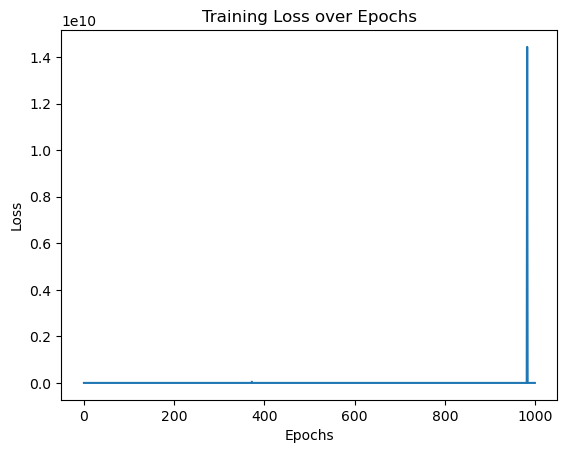

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the Diffusion Model (Neural Network for Reverse Diffusion)
class DiffusionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(DiffusionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, input_dim)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Define the Forward Diffusion Process (Adding Gaussian Noise)
def forward_diffusion(x, betas, t):
    noise = torch.randn_like(x) * torch.sqrt(betas[t])
    return x * (1 - betas[t]) + noise

# Define the Reverse Diffusion Process (Denoising)
def reverse_diffusion(z_t, model, betas, timesteps):
    for t in range(timesteps - 1, -1, -1):
        predicted_noise = model(z_t)
        z_t = (z_t - predicted_noise) / (1 - betas[t])  # Reverse process
    return z_t

# Define the Training Loop
def train(model, data, betas, timesteps, epochs, lr=0.001):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_history = []
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        
        for x in data:
            x = x.view(-1)  # Flatten the input image
            
            # Add noise to the image (forward diffusion)
            noisy_image = forward_diffusion(x, betas, timesteps - 1)
            
            # Reverse diffusion (denoising)
            denoised_image = reverse_diffusion(noisy_image, model, betas, timesteps)
            
            # Compute the loss (using MSE as a proxy for ELBO)
            loss = torch.mean((denoised_image - x) ** 2)  # Simplified loss
            total_loss += loss.item()
            
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        loss_history.append(total_loss / len(data))
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(data)}")
    
    return loss_history

# Generate Synthetic Data (for Testing)
def generate_synthetic_data(num_samples, input_dim):
    return torch.randn(num_samples, input_dim)

# Main execution script
if __name__ == "__main__":
    # Parameters
    input_dim = 784  # For MNIST-like images (28x28 flattened)
    hidden_dim = 128
    timesteps = 10  # Number of diffusion steps
    betas = torch.linspace(0.001, 0.2, timesteps)  # Beta schedule
    epochs = 1000
    learning_rate = 0.001
    num_samples = 100  # Number of training samples

    # Generate synthetic data
    data = generate_synthetic_data(num_samples, input_dim)

    # Initialize model
    model = DiffusionModel(input_dim, hidden_dim)

    # Train the model
    loss_history = train(model, data, betas, timesteps, epochs, lr=learning_rate)

    # Plot the loss
    plt.plot(loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()


In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Define a simple neural network-like structure for the Diffusion Model
class DiffusionModel:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.weights_1 = [[random.random() for _ in range(input_dim)] for _ in range(hidden_dim)]
        self.bias_1 = [random.random() for _ in range(hidden_dim)]
        self.weights_2 = [[random.random() for _ in range(hidden_dim)] for _ in range(input_dim)]
        self.bias_2 = [random.random() for _ in range(input_dim)]

    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def forward(self, x):
        # Flatten input (1D list)
        hidden_output = []
        for i in range(self.hidden_dim):
            hidden_sum = sum(x[j] * self.weights_1[i][j] for j in range(self.input_dim)) + self.bias_1[i]
            hidden_output.append(self.sigmoid(hidden_sum))
        
        output = []
        for i in range(self.input_dim):
            output_sum = sum(hidden_output[j] * self.weights_2[i][j] for j in range(self.hidden_dim)) + self.bias_2[i]
            output.append(output_sum)
        return output

# Define the Forward Diffusion Process (Adding Gaussian Noise)
def forward_diffusion(x, betas, t):
    noisy_image = []
    for xi in x:
        noise = random.gauss(0, math.sqrt(betas[t]))
        noisy_image.append(xi * (1 - betas[t]) + noise)
    return noisy_image

# Define the Reverse Diffusion Process (Denoising)
def reverse_diffusion(z_t, model, betas, timesteps):
    for t in range(timesteps - 1, -1, -1):
        predicted_noise = model.forward(z_t)
        z_t = [(z - predicted_noise[i]) / (1 - betas[t]) for i, z in enumerate(z_t)]
    return z_t

# Define the Training Loop
def train(model, data, betas, timesteps, epochs, lr=0.001):
    loss_history = []
    
    for epoch in range(epochs):
        total_loss = 0
        
        for x in data:
            # Add noise to the image (forward diffusion)
            noisy_image = forward_diffusion(x, betas, timesteps - 1)
            
            # Reverse diffusion (denoising)
            denoised_image = reverse_diffusion(noisy_image, model, betas, timesteps)
            
            # Compute the loss (using MSE as a proxy for ELBO)
            loss = sum((d - o) ** 2 for d, o in zip(denoised_image, x)) / len(x)  # Mean Squared Error
            total_loss += loss
        
        loss_history.append(total_loss / len(data))
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(data)}")
    
    return loss_history

# Generate Synthetic Data (for Testing)
def generate_synthetic_data(num_samples, input_dim):
    return [[random.random() for _ in range(input_dim)] for _ in range(num_samples)]

# Main execution script
if __name__ == "__main__":
    # Parameters
    input_dim = 784  # For MNIST-like images (28x28 flattened)
    hidden_dim = 128
    timesteps = 10  # Number of diffusion steps
    betas = [0.001 + (i * (0.2 - 0.001) / (timesteps - 1)) for i in range(timesteps)]  # Beta schedule
    epochs = 1000
    learning_rate = 0.001
    num_samples = 100  # Number of training samples

    # Generate synthetic data
    data = generate_synthetic_data(num_samples, input_dim)

    # Initialize model
    model = DiffusionModel(input_dim, hidden_dim)

    # Train the model
    loss_history = train(model, data, betas, timesteps, epochs, lr=learning_rate)

    # Plot the loss
    plt.plot(loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()


### Further Discussion on Diffusion-based Models

In the context of diffusion-based models, there is an interesting observation regarding the mutual information terms. Specifically, we note that all mutual information terms, except for the one involving $ \mathbf{z}_1 $, are actually zero. To see why, let's recall the stochastic dependencies of the variational posteriors in these models. These dependencies are given by:

$$
x \rightarrow z_1 \rightarrow z_2 \rightarrow \cdots \rightarrow z_{t-1} \rightarrow z_t \rightarrow \cdots \rightarrow z_T
$$

This structure implies that once $ z_{t-1} $ is given, the distribution of $ z_t $ is independent of the earlier variables. Specifically, we have:

$$
q_\phi(z_t | z_1, \ldots, z_{t-1}, x) = q_\phi(z_t | z_{t-1})
$$

Therefore, a single mutual information term $ I[q_\phi(x, z_1:T); x; z_t | z_{t-1}] $ can be written as:

$$
I[q_\phi(x, z_1:T); x; z_t | z_{t-1}] = D_{\text{KL}}\left(q_\phi(z_t | x, z_{t-1}) \parallel q_\phi(z_t | z_{t-1}) \cdot q_\phi(x | z_{t-1})\right)
$$

Given the structure of the variational posterior, we find that this term evaluates to zero:

$$
D_{\text{KL}}(q_\phi(z_t | x, z_{t-1}) \parallel q_\phi(z_t | z_{t-1}) \cdot q_\phi(x | z_{t-1})) = 0
$$

Thus, all mutual information terms except $ I[q_\phi(x, z_1); x; z_1] $ vanish.

### Hypothesis on Learning a Latent Variable Model

This observation leads to an interesting hypothesis for learning a latent variable model using variational inference:

**Hypothesis:** To successfully learn a latent variable model with variational inference, the family of variational distributions must be defined such that the mutual information between the latent variables and the observables is minimized.

In the case of diffusion-based models, this is achieved by defining the variational posteriors in a very specific manner (using Gaussian diffusion). The mutual information terms are not minimized in these models, which allows the optimization process to focus on minimizing the reconstruction error and the Kullback-Leibler terms. This is a key factor that makes diffusion-based models successful.

### Self-supervised Learning Perspective

An interesting aspect of diffusion-based models is their potential connection to self-supervised learning. Since the variational distributions $ q_\phi(z_t | x) $ and $ q_\phi(z_t | z_{t+1}, x) $ are Gaussian and can be expressed analytically, the ELBO can be optimized by sampling $ z_t $ and optimizing the Kullback-Leibler divergence terms in a stochastic manner. This allows us to sample $ t $ and optimize the ELBO without needing to optimize all $ T $ steps.

This process can be seen as a form of **self-supervised learning**, where we add noise to an image and then learn how to remove this noise at each step. In this setup, noisy pixels at the $ t $-th level serve as labels for the more noisy pixels at the $ (t+1) $-th level. This self-supervised learning perspective highlights the role of variational posteriors in diffusion-based models and their connection to learning with noisy data.

### Conclusion

The strength of diffusion-based models lies in their ability to focus on minimizing reconstruction error and Kullback-Leibler divergence by defining variational posteriors in a manner that avoids minimizing mutual information terms. This design choice plays a critical role in the success of diffusion-based models and provides insight into how they operate within the broader landscape of latent variable models and self-supervised learning.


In [ ]:
import random
import math
from typing import List

# Gaussian distribution helper functions
def gaussian_sample(mean: float, stddev: float) -> float:
    """Generate a random sample from a Gaussian distribution."""
    return random.gauss(mean, stddev)

def gaussian_pdf(x: float, mean: float, stddev: float) -> float:
    """Calculate the probability density function of a Gaussian distribution."""
    return (1.0 / (stddev * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - mean) / stddev) ** 2)

# Diffusion process functions
def forward_diffusion(x: List[float], beta_t: float) -> List[float]:
    """Forward diffusion process: Adds Gaussian noise to the input."""
    noisy_x = [gaussian_sample(x_i, math.sqrt(beta_t)) for x_i in x]
    return noisy_x

def backward_diffusion(z_t: List[float], beta_t: float, model_params: List[float]) -> List[float]:
    """Backward diffusion process: Removes Gaussian noise based on model parameters."""
    cleaned_z = [z_i - model_params[i] * math.sqrt(beta_t) for i, z_i in enumerate(z_t)]
    return cleaned_z

# Variational posteriors for forward and backward diffusion
def q_phi(z_t_given_z_t_minus_1: List[float], beta_t: float) -> List[float]:
    """Variational posterior qφ(zt | zt-1) for the forward diffusion."""
    return [gaussian_sample(z_t_minus_1, math.sqrt(beta_t)) for z_t_minus_1 in z_t_given_z_t_minus_1]

# Kullback-Leibler divergence for Gaussian distributions
def kl_divergence(mu1: float, std1: float, mu2: float, std2: float) -> float:
    """Calculate the Kullback-Leibler divergence between two Gaussian distributions."""
    return math.log(std2 / std1) + (std1 ** 2 + (mu1 - mu2) ** 2) / (2 * std2 ** 2) - 0.5

# ELBO calculation (simplified version)
def elbo(x: List[float], z_t: List[float], model_params: List[float], beta_t: float) -> float:
    """Calculate a simplified ELBO (Evidence Lower Bound) for the diffusion model."""
    reconstruction_error = sum((x_i - z_i) ** 2 for x_i, z_i in zip(x, z_t))  # L2 loss (simplified)
    kl_term = sum(kl_divergence(z_i, 1.0, model_params[i], math.sqrt(beta_t)) for i, z_i in enumerate(z_t))
    return -reconstruction_error - kl_term

# Example usage
if __name__ == "__main__":
    # Example input data (x)
    x = [2.0, 3.0, 1.5, 4.0]  # Some example data (e.g., an image vector or feature vector)
    T = 10  # Number of diffusion steps
    beta_t = 0.1  # Diffusion parameter at step t

    # Diffusion model parameters (just an example; in practice, these would be learned)
    model_params = [random.uniform(0, 1) for _ in range(len(x))]  # Random parameters for backward diffusion

    # Forward diffusion: add noise
    noisy_x = forward_diffusion(x, beta_t)

    # Backward diffusion: remove noise using model parameters
    cleaned_x = backward_diffusion(noisy_x, beta_t, model_params)

    # Calculate ELBO for the model (simplified)
    elbo_value = elbo(x, noisy_x, model_params, beta_t)
    print(f"ELBO Value: {elbo_value:.4f}")

    # Print results
    print(f"Original x: {x}")
    print(f"Noisy x (after forward diffusion): {noisy_x}")
    print(f"Cleaned x (after backward diffusion): {cleaned_x}")
